In [15]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 15,6
import warnings
warnings.filterwarnings('ignore')

In [37]:
spot=pd.read_csv("FED-RXI_N_M_IN.csv", dtype={'value':object},index_col=[0],parse_dates=[0])
td = pd.read_csv("FED-RXI_N_M_IN.csv", dtype={'value': object},index_col=[0],nrows=444, parse_dates=[0]) 
                         #1973-2010 
##test_data =  #2011-2020

In [38]:
spot.reset_index()['Date'].describe()

count                     584
unique                    584
top       1986-06-30 00:00:00
freq                        1
first     1973-01-31 00:00:00
last      2021-08-31 00:00:00
Name: Date, dtype: object

In [39]:
td.shape

(444, 1)

In [40]:
td.head()

,Value
Date,
1973-01-31,8.0041
1973-02-28,7.7538
1973-03-31,7.5465
1973-04-30,7.5462
1973-05-31,7.4927


In [41]:
td.tail(10)

,Value
Date,
2009-03-31,51.1291
2009-04-30,49.9655
2009-05-31,48.5100
2009-06-30,47.6736
2009-07-31,48.3624
2009-08-31,48.2426
2009-09-30,48.2924
2009-10-31,46.6524
2009-11-30,46.5305


In [42]:
td.describe()

,Value
count,444.000000
mean,25.629844
std,15.725363
min,7.271900
25%,9.295750
50%,23.337350
75%,42.870675
max,51.129100


In [43]:
spot.describe()

,Value
count,584.000000
mean,34.352353
std,21.229727
min,7.271900
25%,12.095425
50%,35.887650
75%,47.796950
max,76.168200


In [44]:
## Finding rolling mean 
rolmean=td.rolling(window=12).mean()
rolstd=td.rolling(window=12).std()
print (rolmean,rolstd)

                Value
Date                 
1973-01-31        NaN
1973-02-28        NaN
1973-03-31        NaN
1973-04-30        NaN
1973-05-31        NaN
...               ...
2009-08-31  48.611792
2009-09-30  48.841992
2009-10-31  48.678400
2009-11-30  48.484967
2009-12-31  48.319475

[444 rows x 1 columns]                Value
Date                
1973-01-31       NaN
1973-02-28       NaN
1973-03-31       NaN
1973-04-30       NaN
1973-05-31       NaN
...              ...
2009-08-31  1.322399
2009-09-30  0.914767
2009-10-31  1.113008
2009-11-30  1.270687
2009-12-31  1.390360

[444 rows x 1 columns]


Text(0.5, 1.0, 'Spot Exchange price RS/$')

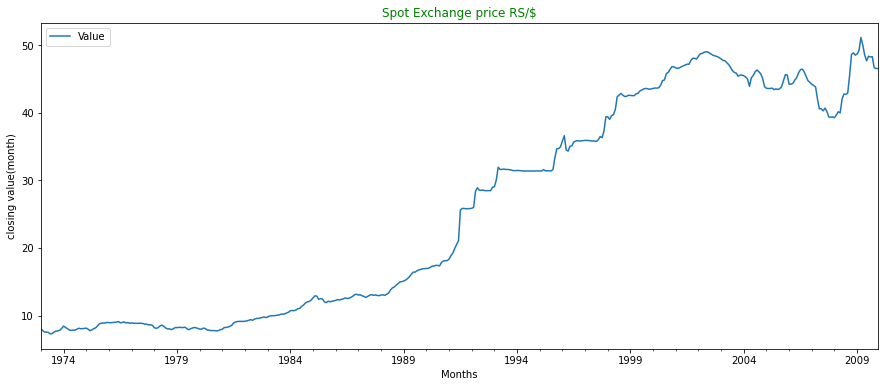

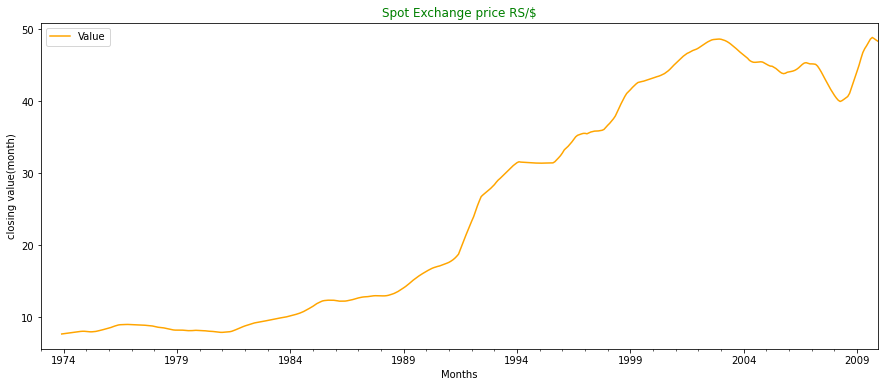

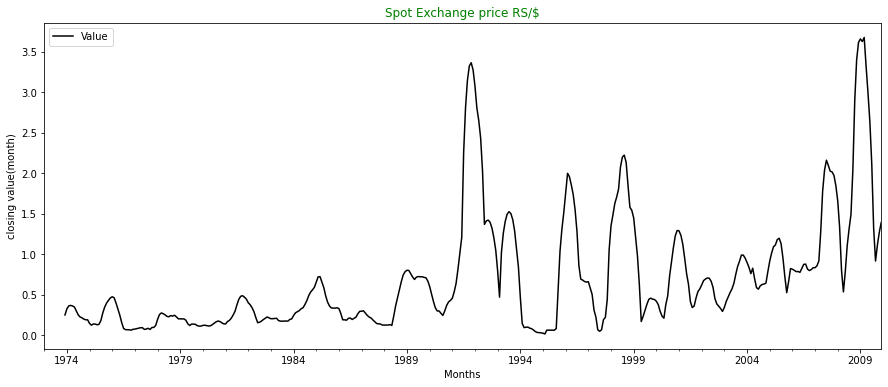

In [45]:
td.plot()
plt.xlabel("Months")
plt.ylabel("closing value(month)")
plt.title("Spot Exchange price RS/$", color="Green")
rolmean.plot(color="orange")
plt.xlabel("Months")
plt.ylabel("closing value(month)")
plt.title("Spot Exchange price RS/$", color="Green")
rolstd.plot(color="black")
plt.xlabel("Months")
plt.ylabel("closing value(month)")
plt.title("Spot Exchange price RS/$", color="Green")

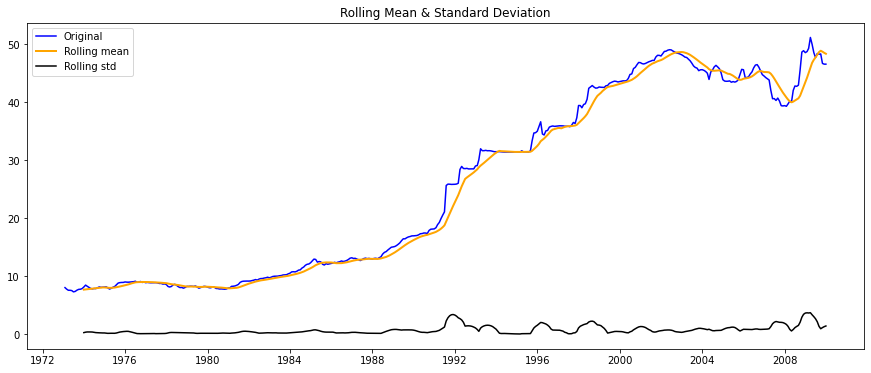

In [46]:
#Plot rolling statistics:
orig = plt.plot(td, color='blue', label='Original')
mean = plt.plot(rolmean, color='orange',linewidth=2, label='Rolling mean')
std = plt.plot(rolstd, color='black', label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [47]:
##PERFORM DICKEY-FULLER TEST FOR CLOSING VALUE 
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test:")

dft=adfuller(td['Value'],regression='c',autolag='AIC')

dfoutput=pd.Series(dft[0:4], index=['Test Statistic', 'p-value', '#Lags used','Number of Observations used'])
for key,value in dft[4].items():
    dfoutput['Critical Value (%s) '%key]=value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -0.521133
p-value                          0.887826
#Lags used                       8.000000
Number of Observations used    435.000000
Critical Value (1%)             -3.445473
Critical Value (5%)             -2.868207
Critical Value (10%)            -2.570321
dtype: float64


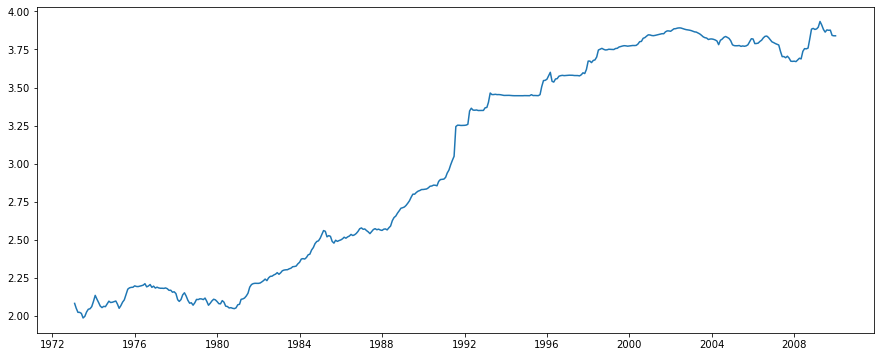

In [48]:
#Estimating trend
td_logScale= np.log(td)
plt.plot(td_logScale)
spot_logScale=np.log(spot)

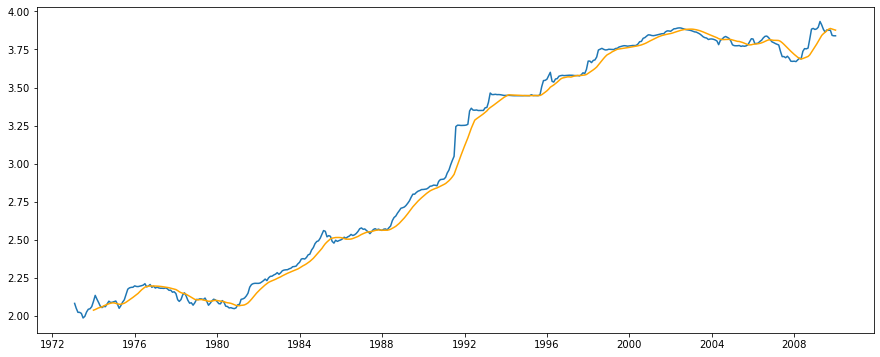

In [49]:
movingAverage= td_logScale.rolling(window=12).mean()
movingSTD= td_logScale.rolling(window=12).std()
plt.plot(td_logScale)
plt.plot(movingAverage, color= 'orange')
ma=spot_logScale.rolling(window=12).mean()
mstd=spot_logScale.rolling(window=12).std()

In [50]:
tdLogScaleMinusMovingAverage=td_logScale-movingAverage
tdLogScaleMinusMovingAverage.head(12)

#remove null values
tdLogScaleMinusMovingAverage.dropna(inplace=True)
tdLogScaleMinusMovingAverage.head(10)

##SPOT LOG VALUES
spotLogScaleMinusMovingAverage=spot_logScale-ma
spotLogScaleMinusMovingAverage.dropna(inplace=True)


In [51]:
##AUGMENTED DICKEY-FULLER TEST
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determine rolling statistics
    movingAverage= timeseries.rolling(window=12).mean()
    movingSTD= timeseries.rolling(window=12).std()
    
    #plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color ='orange', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test:
    print("Results of Dickey-Fuller Test:")
    dft = adfuller(timeseries['Value'], autolag='AIC')
    dfoutput = pd.Series(dft[0:4],index=['Test Statistic', 'p-value', '#Lags used','Number of Observations used'])
    for key, value in dft[4].items():
        dfoutput['Critical Value (%s) '%key] = value
    print(dfoutput)
   

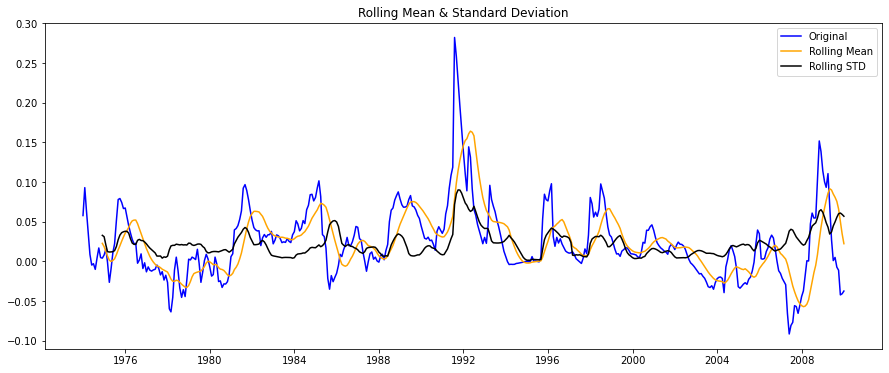

Results of Dickey-Fuller Test:
Test Statistic                  -5.344305
p-value                          0.000004
#Lags used                       8.000000
Number of Observations used    424.000000
Critical Value (1%)             -3.445867
Critical Value (5%)             -2.868381
Critical Value (10%)            -2.570414
dtype: float64


In [52]:
test_stationarity(tdLogScaleMinusMovingAverage)

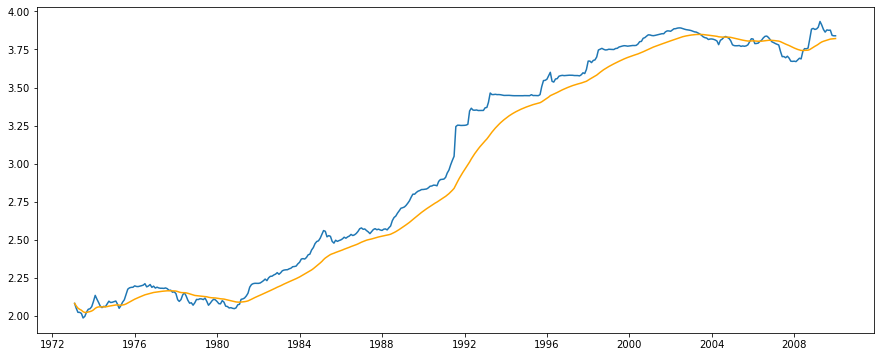

In [53]:
expDecayWeightedAverage= td_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(td_logScale)
plt.plot(expDecayWeightedAverage, color= "orange")
spotexpDecayWeightedAverage= spot_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()

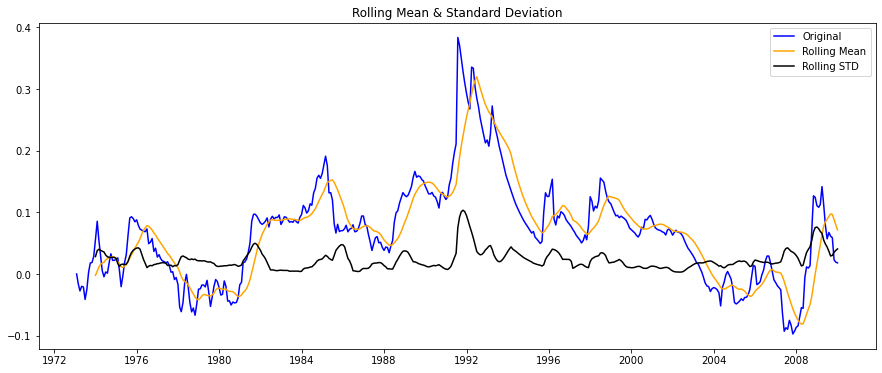

Results of Dickey-Fuller Test:
Test Statistic                  -2.836914
p-value                          0.053191
#Lags used                       8.000000
Number of Observations used    435.000000
Critical Value (1%)             -3.445473
Critical Value (5%)             -2.868207
Critical Value (10%)            -2.570321
dtype: float64


In [54]:
datasetLogScaleMinusMovingExponentialDecayAverage=td_logScale-expDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)
SpotLogScaleMinusMovingExponentialDecayAverage=spot_logScale-spotexpDecayWeightedAverage

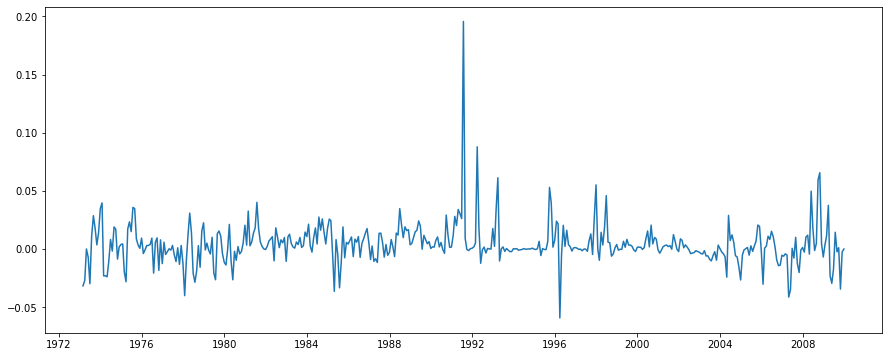

In [55]:
##
DatasetLogDiffShifting=td_logScale-td_logScale.shift()
plt.plot(DatasetLogDiffShifting)
## shifting data again
SpotLogDiffShifting=spot_logScale - spot_logScale.shift()


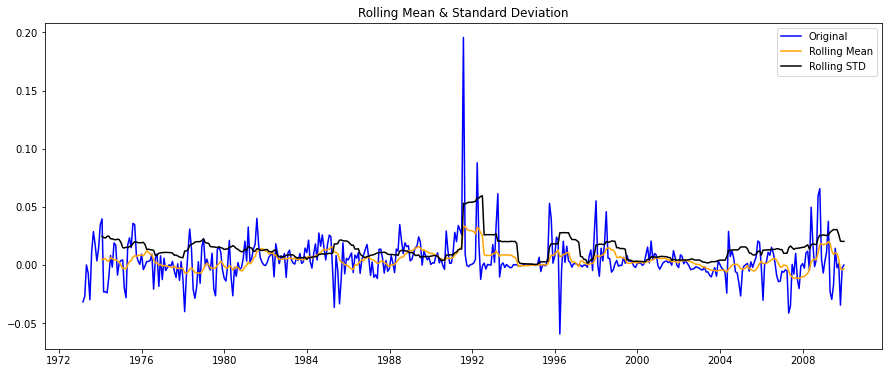

Results of Dickey-Fuller Test:
Test Statistic                  -5.638200
p-value                          0.000001
#Lags used                       7.000000
Number of Observations used    435.000000
Critical Value (1%)             -3.445473
Critical Value (5%)             -2.868207
Critical Value (10%)            -2.570321
dtype: float64


In [62]:
DatasetLogDiffShifting.dropna(inplace=True)
test_stationarity(DatasetLogDiffShifting)

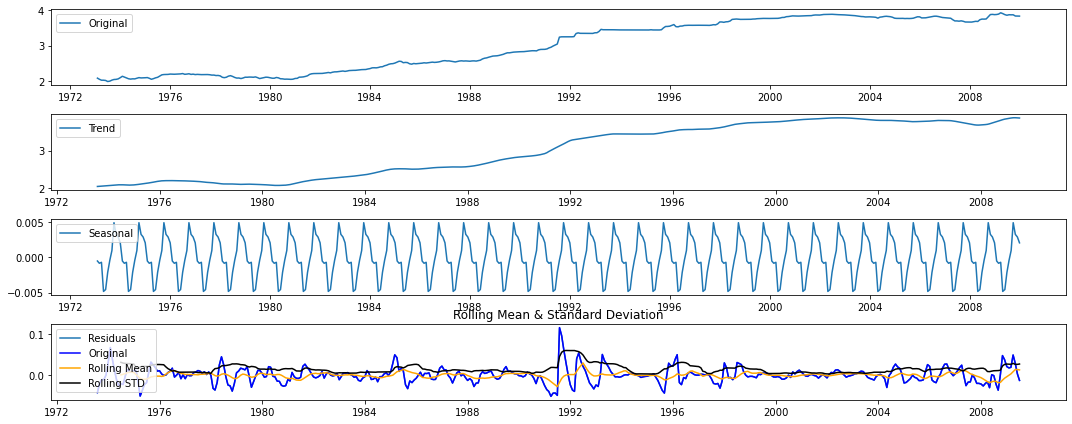

Results of Dickey-Fuller Test:
Test Statistic                -8.212744e+00
p-value                        6.749620e-13
#Lags used                     1.600000e+01
Number of Observations used    4.150000e+02
Critical Value (1%)           -3.446206e+00
Critical Value (5%)           -2.868530e+00
Critical Value (10%)          -2.570493e+00
dtype: float64


In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(td_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
residual = residual.to_frame().rename(columns = {'resid':'Value'})

plt.subplot(411)
plt.plot(td_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

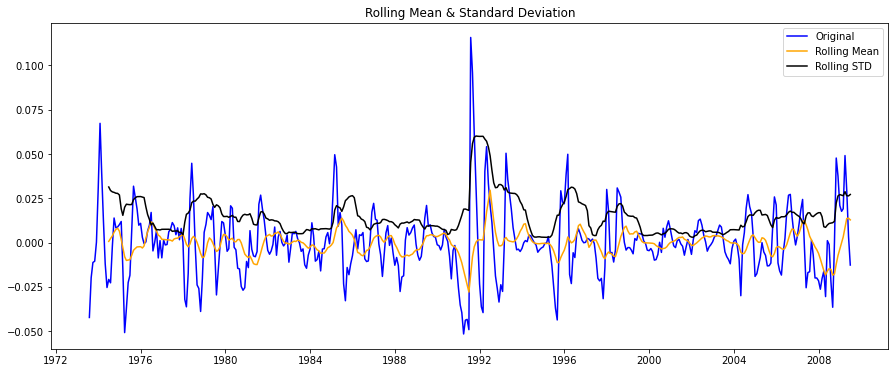

Results of Dickey-Fuller Test:
Test Statistic                -8.212744e+00
p-value                        6.749620e-13
#Lags used                     1.600000e+01
Number of Observations used    4.150000e+02
Critical Value (1%)           -3.446206e+00
Critical Value (5%)           -2.868530e+00
Critical Value (10%)          -2.570493e+00
dtype: float64


In [64]:
decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

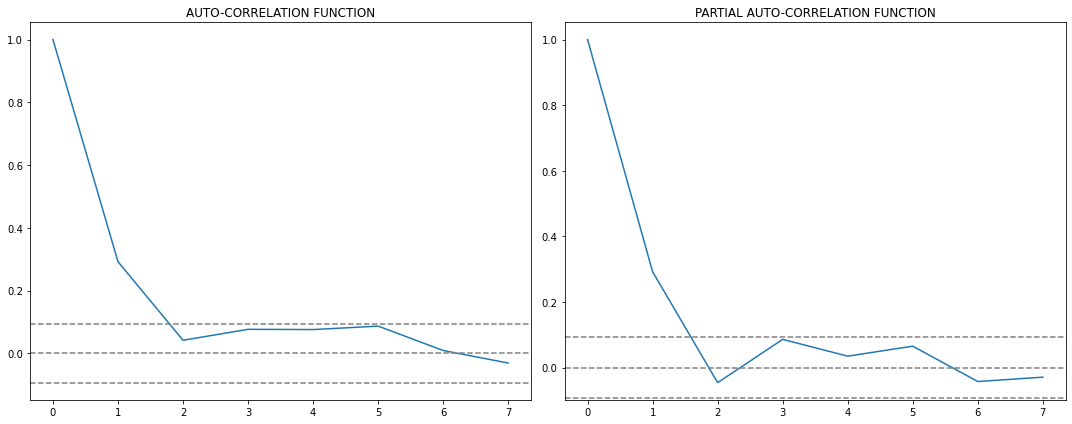

In [77]:
###to predict ACF PACF further:
from statsmodels.tsa.stattools import acf, pacf
import warnings


lag_acf=acf(DatasetLogDiffShifting, nlags=7)
lag_pacf=pacf(DatasetLogDiffShifting,nlags=7, method='ols')


##plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(DatasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(DatasetLogDiffShifting)), linestyle='--', color= 'gray')
plt.title('AUTO-CORRELATION FUNCTION')

##PLOT PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(DatasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(DatasetLogDiffShifting)), linestyle='--', color= 'gray')
plt.title('PARTIAL AUTO-CORRELATION FUNCTION')
plt.tight_layout()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


Plotting AR model


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


Plotting AR model


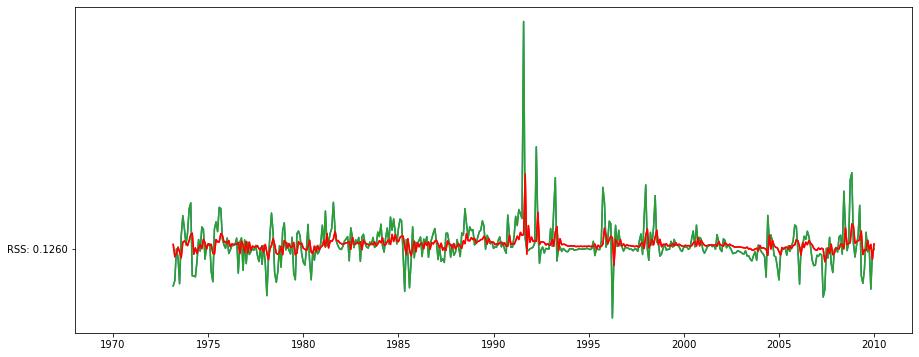

In [93]:
from statsmodels.tsa.arima_model import ARIMA

## AR model
model=ARIMA(td_logScale, order=(2,1,2))
results_AR=model.fit(disp=-1)
plt.plot(DatasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot('RSS: %.4f'% sum((results_AR.fittedvalues-DatasetLogDiffShifting["Value"])**2))
print('Plotting AR model')

##for SPOT 1973-2020

## AR model
model_spot=ARIMA(spot_logScale, order=(2,1,2))
results_spot_AR=model.fit(disp=-1)
plt.plot(DatasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot('RSS: %.4f'% sum((results_AR.fittedvalues-DatasetLogDiffShifting["Value"])**2))
print('Plotting AR model')



C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


Plotting MA model


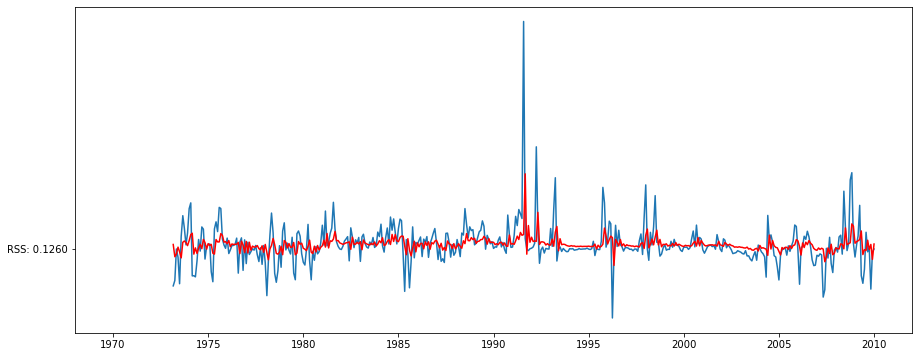

In [94]:
## MA model
model=ARIMA(td_logScale, order=(2,1,2))
results_MA=model.fit(disp=-1)
plt.plot(DatasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.plot('RSS: %.4f'% sum((results_MA.fittedvalues-DatasetLogDiffShifting["Value"])**2))
print('Plotting MA model')

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


Plotting AR model


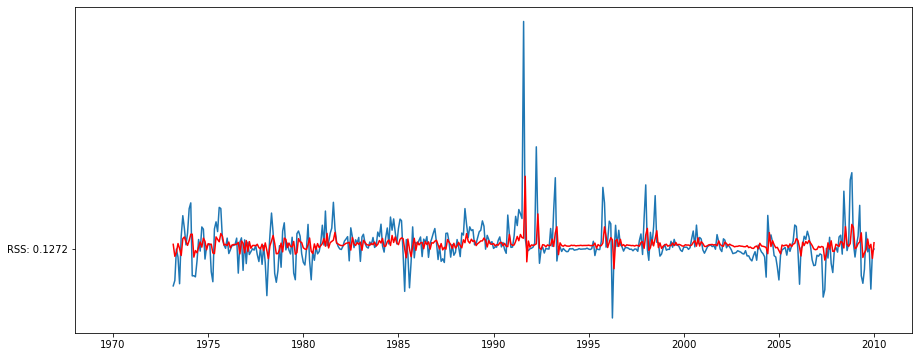

In [95]:
## ARIMA model
model=ARIMA(td_logScale, order=(0,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(DatasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.plot('RSS: %.4f'% sum((results_ARIMA.fittedvalues-DatasetLogDiffShifting["Value"])**2))
print('Plotting AR model')

In [96]:
##NOW WE WILL PREDICT
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Date
1973-02-28    0.003950
1973-03-31   -0.006333
1973-04-30   -0.002810
1973-05-31    0.004630
1973-06-30    0.000295
dtype: float64


In [97]:
#convert to cummulative sum
predictions_ARIMA_diff_cumsum= predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
1973-02-28    0.003950
1973-03-31   -0.002384
1973-04-30   -0.005194
1973-05-31   -0.000565
1973-06-30   -0.000269
dtype: float64


In [98]:
predictions_ARIMA_log = pd.Series(spot_logScale[['Value']].iloc[:,0], td_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
1973-01-31    2.079954
1973-02-28    2.052133
1973-03-31    2.018700
1973-04-30    2.015850
1973-05-31    2.013365
dtype: float64

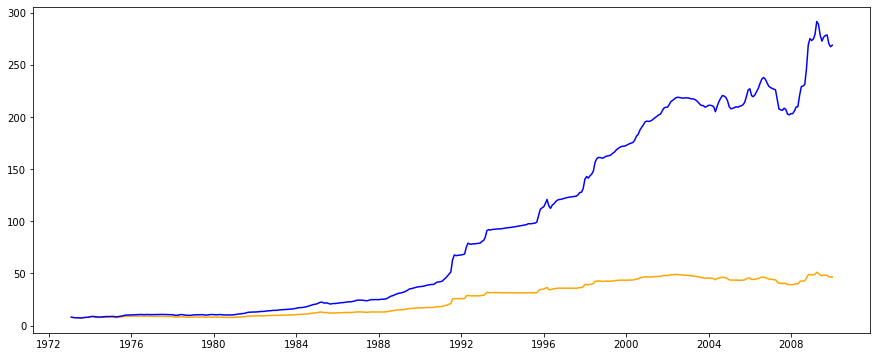

In [99]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(td, color='orange')
plt.plot(predictions_ARIMA, color='blue')


In [100]:
td_logScale.reset_index()

,Date,Value
0,1973-01-31,2.079954
1,1973-02-28,2.048183
2,1973-03-31,2.021084
3,1973-04-30,2.021044
4,1973-05-31,2.013929
...,...,...
439,2009-08-31,3.876242
440,2009-09-30,3.877274
441,2009-10-31,3.842724
442,2009-11-30,3.840108


In [101]:
td_logScale

,Value
Date,
1973-01-31,2.079954
1973-02-28,2.048183
1973-03-31,2.021084
1973-04-30,2.021044
1973-05-31,2.013929
...,...
2009-08-31,3.876242
2009-09-30,3.877274
2009-10-31,3.842724


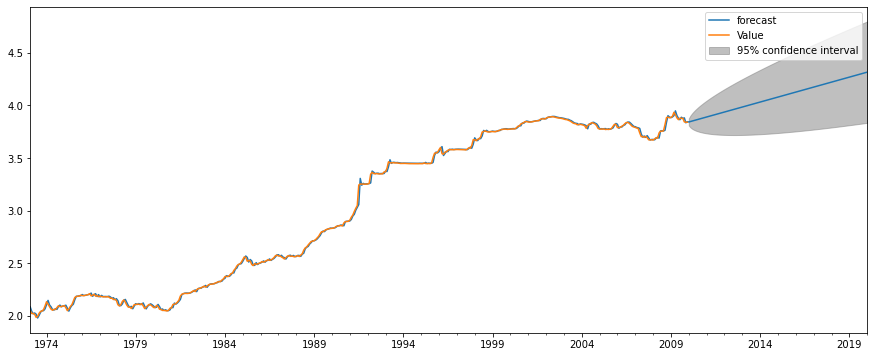

In [86]:
results_ARIMA.plot_predict(1,564)
x=results_ARIMA.forecast(steps=120)

In [128]:
len(x[1])

120

In [ ]:
# Compare with test_data
# Metrics - RMSE